In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

# fetch dataset
mushroom = fetch_ucirepo(id=73)

x = mushroom.data.features
y = mushroom.data.targets

# Define features and target variable
#X = df.drop(columns=['loan_status'])
#y = df['loan_status']

In [ ]:
x.head()

In [ ]:
y.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
# Apply label encoding to all categorical columns
for col in x.columns:
    x.loc[:, col] = label_encoder.fit_transform(x[col])

# Encode the target variable as well
y = label_encoder.fit_transform(y)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
type(y)

numpy.ndarray

In [ ]:
y_series = pd.Series(y)
y_series.head()

,0
0,1
1,0
2,0
3,1
4,0


In [ ]:
y_series.head()

,0
0,1
1,0
2,0
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y_series, test_size=0.2, random_state=42)

# Verifying the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6499, 22)
X_test shape: (1625, 22)
y_train shape: (6499,)
y_test shape: (1625,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Decision Tree Classifier Accuracy:", accuracy)


Decision Tree Classifier Accuracy: 1.0


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Naïve Bayes Classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print the accuracy
print("Naïve Bayes Classifier Accuracy:", accuracy_nb)


Naïve Bayes Classifier Accuracy: 0.9286153846153846


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
def calculate_accuracy(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n🔹 {model_name} Accuracy: {accuracy:.4f}")
    return accuracy

In [ ]:
def calculate_precision(y_true, y_pred, model_name):
    precision = precision_score(y_true, y_pred, average='weighted')
    print(f"\n🔹 {model_name} Precision: {precision:.4f}")
    return precision

In [ ]:
def calculate_recall(y_true, y_pred, model_name):
    recall = recall_score(y_true, y_pred, average='weighted')
    print(f"\n🔹 {model_name} Recall: {recall:.4f}")
    return recall


In [ ]:
def calculate_f1_score(y_true, y_pred, model_name):
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"\n🔹 {model_name} F1-Score: {f1:.4f}")
    return f1

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

In [ ]:
# Dictionary to store results
results = {}


 Decision Tree Classifier Evaluation

🔹 Decision Tree Accuracy: 1.0000

🔹 Decision Tree Precision: 1.0000

🔹 Decision Tree Recall: 1.0000

🔹 Decision Tree F1-Score: 1.0000


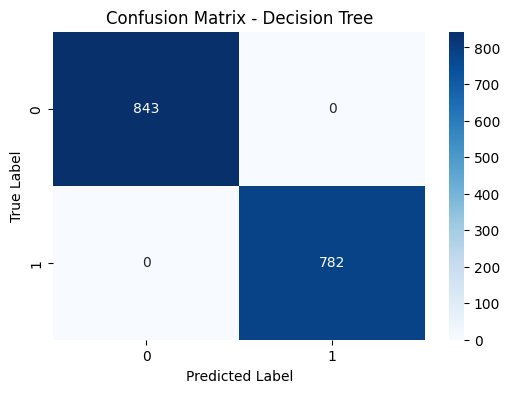

In [ ]:
# Evaluate Decision Tree Classifier
print("\n Decision Tree Classifier Evaluation")
results["Decision Tree"] = {
    "Accuracy": calculate_accuracy(y_test, y_pred, "Decision Tree"),
    "Precision": calculate_precision(y_test, y_pred, "Decision Tree"),
    "Recall": calculate_recall(y_test, y_pred, "Decision Tree"),
    "F1-Score": calculate_f1_score(y_test, y_pred, "Decision Tree"),
}
plot_confusion_matrix(y_test, y_pred, "Decision Tree")


Naïve Bayes Classifier Evaluation ===

🔹 Naïve Bayes Accuracy: 0.9286

🔹 Naïve Bayes Precision: 0.9286

🔹 Naïve Bayes Recall: 0.9286

🔹 Naïve Bayes F1-Score: 0.9286


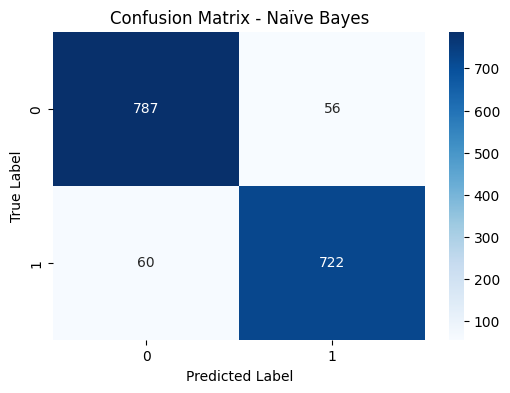

In [ ]:
# Evaluate Naïve Bayes Classifier
print("\nNaïve Bayes Classifier Evaluation ===")
results["Naïve Bayes"] = {
    "Accuracy": calculate_accuracy(y_test, y_pred_nb, "Naïve Bayes"),
    "Precision": calculate_precision(y_test, y_pred_nb, "Naïve Bayes"),
    "Recall": calculate_recall(y_test, y_pred_nb, "Naïve Bayes"),
    "F1-Score": calculate_f1_score(y_test, y_pred_nb, "Naïve Bayes"),
}
plot_confusion_matrix(y_test, y_pred_nb, "Naïve Bayes")


In [ ]:
# Convert dictionary to DataFrame for better visualization
df_results = pd.DataFrame(results).T
print("\nEvaluation Results")
display(df_results)


Evaluation Results


,Accuracy,Precision,Recall,F1-Score
Decision Tree,1.000000,1.000000,1.000000,1.000000
Naïve Bayes,0.928615,0.928613,0.928615,0.928608
